# 🏪 Proyecto Aurelion

Este notebook documenta el proceso de **análisis, limpieza y transformación de datos** de la tabla `PRODUCTOS` del proyecto *Aurelion*, utilizando la biblioteca **Pandas** en Python.

El objetivo es preparar un conjunto de datos estructurado, limpio y estandarizado para posteriores procesos de análisis estadístico, modelado o visualización.

## 📊 Descripción General

La tabla `PRODUCTOS` contiene el catálogo de artículos disponibles para venta, incluyendo identificadores, nombres, categorías y precios unitarios.

### Tareas Principales del Notebook

1. **Importación de datos** desde archivo Excel con rutas portables.
2. **Inspección inicial** para validar estructura, tipos y valores faltantes.
3. **Normalización de tipos de datos** y limpieza de texto (espacios, mayúsculas).
4. **Optimización de memoria** mediante conversión a tipo `category`.
5. **Control de calidad** para detectar duplicados y anomalías.
6. **Auditoría de categorización** para identificar productos mal asignados.
7. **Corrección automática** mediante análisis semántico del nombre del producto.

### Metodología ETL Aplicada

- **Extracción (E):** Lectura del archivo Excel con `pd.read_excel()`.
- **Transformación (T):** Normalización de tipos, limpieza de texto, análisis semántico.
- **Carga (L):** Datos corregidos permanecen en memoria para exportación CSV futura (conjunta con otras tablas).

**Nota:** El archivo original `productos.xlsx` NO se modifica. Los cambios se mantienen en el dataframe.

In [22]:
# Importa paquetes de an?lisis (pandas/numpy) y visualizaci?n (matplotlib/seaborn) con rutas portables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


## 🛠 Instalación e Importación de Librerías

En esta sección se instalan y cargan las principales bibliotecas de Python utilizadas para el análisis de datos:

- **pandas:** Manipulación y análisis de dataframes.
- **numpy:** Operaciones numéricas y arrays.
- **matplotlib/seaborn:** Visualización de datos.
- **pathlib:** Rutas portables entre sistemas operativos.

## 📥 Carga del Archivo de Datos

En esta sección se realiza la **importación del dataset principal** utilizando una **ruta relativa** y la librería `pathlib.Path`. Esto no solo simplifica la ruta, sino que también garantiza que el código sea **portable** y funcione correctamente en diferentes sistemas operativos (Windows, macOS, Linux), siempre y cuando la estructura de directorios se mantenga consistente.

> 📂 **Ruta del archivo:**  
> El archivo se accede mediante la construcción **`Path('db') / 'productos.xlsx'`**.

La lectura del archivo se efectúa mediante la función `pd.read_excel()` de la biblioteca **pandas**, creando el dataframe inicial `df_productos_c`, el cual servirá como base para los procesos posteriores de limpieza y análisis.

## 📥 Carga del Archivo de Datos

En esta sección se realiza la **importación del dataset principal** de productos utilizando **rutas relativas** y la librería `pathlib.Path`. Esto garantiza que el código sea **portable** entre sistemas operativos (Windows, macOS, Linux).

> 📂 **Ruta del archivo:** El archivo se accede mediante `Path('db') / 'productos.xlsx'`.

El dataframe inicial `df_productos_c` servirá como base para los procesos posteriores de limpieza y análisis.

In [23]:
# Lee el catálogo de productos desde la carpeta db usando rutas relativas
path_dataset = Path('db') / 'productos.xlsx'
df_productos_c = pd.read_excel(path_dataset)

# Inspecciona los primeros registros para validar estructura y campos
df_productos_c.head()


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777


## 🔍 Inspección Inicial del Dataset

En esta etapa se realiza una **inspección exploratoria básica** del DataFrame `df_productos_c` recién cargado, con el objetivo de verificar que los datos se hayan importado correctamente y posean la estructura esperada.

Para ello, se utilizan las funciones:

## 🔍 Inspección Inicial y Exploración de Datos

En esta etapa se realiza una **inspección exploratoria básica** del DataFrame `df_productos_c` para verificar que los datos se hayan importado correctamente y posean la estructura esperada.

Se evalúan:
- **Estructura y tipos de datos:** Verificación de columnas y tipos (int64, object, float64, etc.).
- **Valores faltantes (NaN):** Identificación de vacíos que requieran tratamiento.
- **Duplicados:** Validación de unicidad en identificadores clave.

In [24]:
# Ampl?a la vista inicial a 8 filas para detectar anomal?as tempranas
df_productos_c.head(8)


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777
5,6,Jugo de Naranja 1L,Limpieza,4170
6,7,Jugo de Manzana 1L,Alimentos,3269
7,8,Energética Nitro 500ml,Limpieza,4218


In [25]:
# Revisa las ?ltimas 4 filas para confirmar consistencia al final del archivo
df_productos_c.tail(4)


,id_producto,nombre_producto,categoria,precio_unitario
96,97,Limpiavidrios 500ml,Alimentos,872
97,98,Desengrasante 500ml,Limpieza,2843
98,99,Esponjas x3,Alimentos,2430
99,100,Trapo de Piso,Limpieza,4854


In [26]:
# Resume tipos de datos, nulos y memoria del dataframe importado
df_productos_c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_producto      100 non-null    int64 
 1   nombre_producto  100 non-null    object
 2   categoria        100 non-null    object
 3   precio_unitario  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


> 💡 **Conclusión:**  
> A partir de la ejecución de la inspección del DataFrame, se observa que la base de datos cuenta con **100 registros** distribuidos en **4 columnas**.  
> Cada columna presenta **100 valores no nulos**, lo que indica que **no existen datos faltantes (NaN)** en el dataset en esta etapa.  
> Los tipos de datos están definidos de la siguiente manera: **campos de identificación y precio** como enteros (`int64`), y **campos descriptivos** (`nombre_producto`, `categoria`) como texto (`object`). Esta estructura inicial es **coherente y está lista** para los procesos de **normalización** (ej. estandarización de texto) y **transformación** (ej. conversión de precios a float).

### 🕵️‍♂️ Detección de Valores Nulos

Se analiza la presencia de valores faltantes para priorizar acciones de limpieza y asegurar la consistencia del dataset.

In [27]:
# Visualiza la máscara booleana donde True marca valores faltantes por celda
df_productos_c.isnull()

,id_producto,nombre_producto,categoria,precio_unitario
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


In [28]:
# Resume la cantidad de nulos por columna para priorizar limpieza
df_productos_c.isnull().sum()

id_producto        0
nombre_producto    0
categoria          0
precio_unitario    0
dtype: int64

## ⚙️ Normalización y Corrección de Tipos de Datos

Antes de realizar la normalización de la base de datos, es necesario **verificar y corregir los tipos de datos** asignados a las variables y estandarizar los campos de texto. En este caso, la columna `precio_unitario` se convierte al formato `float64` para asegurar precisión decimal. Adicionalmente, se **normalizan** los campos de texto (`nombre_producto` y `categoria`) y se optimiza `categoria` a tipo `categórico` para mejorar la eficiencia del DataFrame.

### 🧩 Fundamento

Corregir los tipos de datos garantiza la **precisión numérica** en cálculos y estadísticas. Si el `precio_unitario` se mantuviera como entero, se perdería información decimal y se podrían producir errores al calcular promedios, totales o al aplicar operaciones aritméticas.

Este paso forma parte del proceso de **limpieza estructural** dentro de la metodología ETL (Extract, Transform, Load):

1. **Extracción:** se importan los datos desde el archivo Excel.  
2. **Transformación estructural:** se ajustan los tipos de datos para asegurar coherencia.  
3. **Normalización:** se reorganiza la base, eliminando redundancias o columnas innecesarias.

### 🧮 Procedimiento

- Se aplican las transformaciones para:

     **Precio:** Asegurar formato `float64` (precisión decimal).

     **Texto:** Limpiar `nombre_producto` y `categoria` (eliminar espacios, unificar mayúsculas/minúsculas).

     **Categóricas:** Convertir `categoria` a tipo `category`.

In [29]:
# 1. Corrección de Tipo de Dato Numérico
# Se convierte 'precio_unitario' a float64 para asegurar precisión decimal.
df_productos_c['precio_unitario'] = df_productos_c['precio_unitario'].astype('float64')

# 2. Normalización de Campos de Texto y Categórico
# Se aplica limpieza de espacios y estandarización a campos de texto.
df_productos_c['nombre_producto'] = (
    df_productos_c['nombre_producto']
    .str.strip()
    .str.title() # Formato Título para nombres de producto
)

# Se aplica limpieza y se convierte a categórico para optimizar memoria y agrupación.
df_productos_c['categoria'] = (
    df_productos_c['categoria']
    .str.strip()
    .str.lower()
    .astype('category')
)

## ⚙️ Normalización y Corrección de Tipos de Datos

Antes de realizar análisis, es necesario **verificar y corregir los tipos de datos** asignados a cada columna. En este caso:

- **Precio unitario:** Conversión a `float64` para asegurar precisión decimal en cálculos financieros.
- **Nombre producto y Categoría:** Limpieza de espacios y normalización de mayúsculas/minúsculas.
- **Categoría:** Conversión a tipo `category` para optimizar memoria y facilitar agrupaciones.

### Fundamento

Corregir tipos de datos garantiza:
- ✅ **Precisión numérica** en cálculos financieros.
- ✅ **Consistencia de datos** en análisis y reportes.
- ✅ **Eficiencia de memoria** mediante tipos optimizados.
- ✅ **Facilidad de agrupación** mediante categorías.

In [30]:
# Resumen estadístico limpio y presentable
print('\n=== Resumen estadístico - PRODUCTOS ===\n')
# Dimensiones y tipos
print('Dimensiones:', df_productos_c.shape)
print('\nTipos de datos:')
print(df_productos_c.dtypes.to_string())
# Nulos y duplicados
print('\nNulos por columna:')
print(df_productos_c.isnull().sum().to_string())
print('\nDuplicados totales:', df_productos_c.duplicated().sum())
# Estadísticas numéricas para precio_unitario
print('\nResumen de `precio_unitario`:')
print(df_productos_c['precio_unitario'].describe().to_string())
print('\nEstadísticas adicionales de precio:')
print(f'Mediana: {df_productos_c['precio_unitario'].median():.2f}')
print(f'Desviación típica: {df_productos_c['precio_unitario'].std():.2f}')
# skew puede fallar si hay pocos puntos; lo protegemos
try:
    skew_val = df_productos_c['precio_unitario'].skew()
except Exception:
    skew_val = float('nan')
print(f'Skewness: {skew_val:.2f}')
# Conteos y top valores
print('\nConteo por categoría (top 10):')
print(df_productos_c['categoria'].value_counts().head(10).to_string())
print('\nProductos más frecuentes (top 10):')
print(df_productos_c['nombre_producto'].value_counts().head(10).to_string())
# Resumen final compacto
print('\nResumen final:')
print(f'Productos únicos: {df_productos_c['id_producto'].nunique()} | Categorías únicas: {df_productos_c['categoria'].nunique()}')



=== Resumen estadístico - PRODUCTOS ===

Dimensiones: (100, 4)

Tipos de datos:
id_producto           int64
nombre_producto      object
categoria          category
precio_unitario     float64

Nulos por columna:
id_producto        0
nombre_producto    0
categoria          0
precio_unitario    0

Duplicados totales: 0

Resumen de `precio_unitario`:
count     100.000000
mean     2718.550000
std      1381.635324
min       272.000000
25%      1590.000000
50%      2516.000000
75%      4026.500000
max      4982.000000

Estadísticas adicionales de precio:
Mediana: 2516.00
Desviación típica: 1381.64
Skewness: 0.15

Conteo por categoría (top 10):
categoria
alimentos    50
limpieza     50

Productos más frecuentes (top 10):
nombre_producto
Coca Cola 1.5L             1
Avena Instantánea 250G     1
Whisky 750Ml               1
Gin 700Ml                  1
Ron 700Ml                  1
Vodka 700Ml                1
Fernet 750Ml               1
Sidra 750Ml                1
Vino Blanco 750Ml          

### 🔍 Verificación de Transformaciones Aplicadas

Se valida que los cambios hayan surtido efecto en tipos de datos y muestras de datos.

In [31]:
# Verifica los tipos de datos de las columnas normalizadas tras la conversión en la tabla PRODUCTOS
df_productos_c[["id_producto", "nombre_producto", "categoria", "precio_unitario"]].dtypes

id_producto           int64
nombre_producto      object
categoria          category
precio_unitario     float64
dtype: object

In [32]:
# Realiza muestreo de las columnas transformadas para comprobar resultados
df_productos_c[["id_producto", "nombre_producto", "categoria", "precio_unitario"]].head()

,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,alimentos,2347.0
1,2,Pepsi 1.5L,limpieza,4973.0
2,3,Sprite 1.5L,alimentos,4964.0
3,4,Fanta Naranja 1.5L,limpieza,2033.0
4,5,Agua Mineral 500Ml,alimentos,4777.0


### 🕵️‍♂️ Control de Calidad: Validación de Unicidad

Se evalúa la integridad de registros, especialmente en `id_producto` como identificador clave.

In [33]:
# Evalúa duplicados globales y por id_producto para validar la unicidad clave de productos
cantidad_duplicados = df_productos_c.duplicated().sum()
duplicados_id_producto = df_productos_c['id_producto'].duplicated().sum()

print()
print('--- Registros Duplicados ---')
if cantidad_duplicados > 0:
    print(f'Se encontraron {cantidad_duplicados} filas duplicadas.')
    # Si se encuentran duplicados y se necesita eliminarlos, usar:
    # df_productos_c = df_productos_c_True_duplicates().copy()
else:
    print('No se encontraron filas duplicadas.')

print()
if duplicados_id_producto > 0:
    print(f'Alerta: se detectaron {duplicados_id_producto} valores repetidos en id_producto (posible clave primaria).')
else:
    print('id_producto es único en df_productos_c.')


--- Registros Duplicados ---
No se encontraron filas duplicadas.

id_producto es único en df_productos_c.


> 💡 **Conclusión:**
> Luego de la verificación y **normalización optimizada** de tipos de datos, se confirma que todas las variables del *dataset* `PRODUCTOS` presentan formatos consistentes y adecuados:
>
> * La columna **`precio_unitario`** fue convertida a **`float64`**, lo cual asegura la **precisión decimal** necesaria para cálculos financieros (ej. promedios y márgenes).
> * Las columnas **`nombre_producto`** y **`id_producto`** mantienen tipos coherentes con su contenido (`object` / `int64`), asegurando la **normalización de texto** (eliminación de espacios y unificación de mayúsculas/minúsculas).
> * La variable **`categoria`** fue convertida al tipo **categórico (`category`)**, lo que facilita las agrupaciones y segmentaciones y genera una **mejora en la eficiencia del procesamiento** y el uso de memoria.
>
> De esta forma, el *dataframe* `df_productos_c` queda estructurado de manera coherente, **garantizando integridad, consistencia, y una ligera mejora en la eficiencia del procesamiento** para las etapas posteriores de transformación y análisis.

## 🏆 Resumen: Normalización y Limpieza Completada

Tras la **normalización optimizada**, se confirma que todas las variables presentan formatos consistentes:

✅ **Precio unitario → float64:** Precisión decimal asegurada.  
✅ **Nombre producto → str (título):** Normalización de mayúsculas aplicada.  
✅ **Categoría → category:** Optimización de memoria y facilidad de agrupación.  
✅ **Sin duplicados:** Integridad de identificadores clave validada.  

El dataframe `df_productos_c` está **estructurado, coherente y listo** para la auditoría de categorización.

In [34]:
# Análisis de categorización: identificar productos mal categorizados
# Se utiliza análisis semántico del nombre_producto para detectar incongruencias

print('\n' + '='*100)
print('AUDITORÍA DE CATEGORIZACIÓN DE PRODUCTOS')
print('='*100)

# Mostrar distribución actual de productos por categoría
print('\nDistribución actual de productos por categoría:')
print(df_productos_c['categoria'].value_counts().sort_values(ascending=False).to_string())

print('\n--- Análisis por categoría: primeros 5 productos de cada una ---\n')

# Agrupar por categoría para revisar nombres y detectar incongruencias
for cat in df_productos_c['categoria'].unique():
    productos_cat = df_productos_c[df_productos_c['categoria'] == cat][['id_producto', 'nombre_producto', 'precio_unitario']].head(10)
    print(f'\n📦 Categoría: {cat}')
    print(productos_cat.to_string(index=False))
    print('-' * 100)

print('\n💡 Nota: Revise los nombres de productos y detecte si alguno está mal asignado.')
print('Después de identificar, aplicaremos correcciones sistemáticas en la siguiente celda.')



AUDITORÍA DE CATEGORIZACIÓN DE PRODUCTOS

Distribución actual de productos por categoría:
categoria
alimentos    50
limpieza     50

--- Análisis por categoría: primeros 5 productos de cada una ---


📦 Categoría: alimentos
 id_producto      nombre_producto  precio_unitario
           1       Coca Cola 1.5L           2347.0
           3          Sprite 1.5L           4964.0
           5   Agua Mineral 500Ml           4777.0
           7   Jugo De Manzana 1L           3269.0
           9 Yerba Mate Suave 1Kg           3878.0
          11     Café Molido 250G           2053.0
          13 Té Verde 20 Saquitos           2383.0
          15  Leche Descremada 1L           2538.0
          17   Queso Cremoso 500G           4834.0
          19         Manteca 200G           3251.0
----------------------------------------------------------------------------------------------------

📦 Categoría: limpieza
 id_producto        nombre_producto  precio_unitario
           2             Pepsi 1.5L   

## 🔎 Auditoría de Categorización de Productos

Esta sección realiza una **auditoría completa** para identificar productos mal categorizados utilizando análisis semántico del nombre del producto.

### Metodología

1. **Análisis Semántico:** Se identifican palabras clave específicas de cada categoría en el nombre del producto.
2. **Clasificación Automática:** Se asigna la categoría correcta basada en coincidencias de palabras clave.
3. **Detección de Anomalías:** Se comparan categorías actuales con las recomendadas para identificar errores.

In [35]:
# Corrección de Categorización: Reasignar productos a categorías correctas
# Metodología: Análisis semántico del nombre_producto y reglas de negocio

print('\n' + '='*100)
print('CORRECCIÓN DE CATEGORIZACIÓN: REASIGNACIÓN DE PRODUCTOS')
print('='*100)

# Palabras clave por categoría para identificar productos correctamente
palabras_alimentos = [
    'cola', 'pepsi', 'sprite', 'fanta', 'agua', 'jugo', 'energética', 
    'yerba', 'café', 'té', 'leche', 'queso', 'manteca', 'yogur', 'pan',
    'bebida', 'refresco', 'bebidas', 'lácteos', 'lácteo'
]

palabras_limpieza = [
    'limpiador', 'detergente', 'jabón', 'desinfectante', 'cloro', 
    'escoba', 'trapo', 'esponja', 'cepillo', 'limpieza'
]

# Función para clasificar producto según nombre
def clasificar_producto(nombre_producto):
    """
    Clasifica un producto según palabras clave en su nombre.
    Retorna: 'alimentos' o 'limpieza'
    """
    nombre_lower = nombre_producto.lower()
    
    # Contar coincidencias
    count_alimentos = sum(1 for palabra in palabras_alimentos if palabra in nombre_lower)
    count_limpieza = sum(1 for palabra in palabras_limpieza if palabra in nombre_lower)
    
    # Determinar categoría según coincidencias
    if count_alimentos > count_limpieza:
        return 'alimentos'
    elif count_limpieza > count_alimentos:
        return 'limpieza'
    else:
        # Por defecto, si hay ambigüedad, revisar patrones adicionales
        # Bebidas, alimentos refrigerados → alimentos
        if any(x in nombre_lower for x in ['ml', 'litro', 'l.', '1l', 'kg', 'g.', '200g', '500g', '150g', '250g']):
            return 'alimentos'
        return 'alimentos'  # Por defecto

# Crear una copia para comparar antes/después
df_productos_c['categoria_original'] = df_productos_c['categoria'].copy()
df_productos_c['categoria_correcta'] = df_productos_c['nombre_producto'].apply(clasificar_producto)

# Comparar y mostrar cambios necesarios
cambios = df_productos_c[df_productos_c['categoria'] != df_productos_c['categoria_correcta']]

if len(cambios) > 0:
    print(f'\n✅ Se detectaron {len(cambios)} productos mal categorizados:\n')
    print('PRODUCTOS A REASIGNAR:')
    print('-' * 100)
    cambios_display = cambios[['id_producto', 'nombre_producto', 'categoria_original', 'categoria_correcta', 'precio_unitario']]
    print(cambios_display.to_string(index=False))
    
    # Aplicar correcciones
    print('\n' + '-' * 100)
    print('\nAplicando correcciones...\n')
    
    for idx, row in cambios.iterrows():
        producto = row['nombre_producto']
        cat_vieja = row['categoria_original']
        cat_nueva = row['categoria_correcta']
        df_productos_c.loc[idx, 'categoria'] = cat_nueva
        print(f"  ✓ Producto ID {row['id_producto']:>3d}: '{producto}' movido de '{cat_vieja}' → '{cat_nueva}'")
    
    print(f'\n✅ Corrección completada: {len(cambios)} productos reasignados.')
else:
    print('\n✅ No se detectaron productos mal categorizados. La categorización es correcta.')

# Validar resultado final
print('\n' + '='*100)
print('DISTRIBUCIÓN FINAL DESPUÉS DE CORRECCIONES')
print('='*100)
print('\nProductos por categoría:')
print(df_productos_c['categoria'].value_counts().sort_values(ascending=False).to_string())

# Limpiar columnas temporales
df_productos_c = df_productos_c.drop(columns=['categoria_original', 'categoria_correcta'])

print('\n✅ Dataframe normalizado y listo para análisis.')



CORRECCIÓN DE CATEGORIZACIÓN: REASIGNACIÓN DE PRODUCTOS

✅ Se detectaron 49 productos mal categorizados:

PRODUCTOS A REASIGNAR:
----------------------------------------------------------------------------------------------------
 id_producto            nombre_producto categoria_original categoria_correcta  precio_unitario
           2                 Pepsi 1.5L           limpieza          alimentos           4973.0
           4         Fanta Naranja 1.5L           limpieza          alimentos           2033.0
           6         Jugo De Naranja 1L           limpieza          alimentos           4170.0
           8     Energética Nitro 500Ml           limpieza          alimentos           4218.0
          10     Yerba Mate Intensa 1Kg           limpieza          alimentos           4883.0
          12       Té Negro 20 Saquitos           limpieza          alimentos            570.0
          14            Leche Entera 1L           limpieza          alimentos           1723.0
         

## 🖼️ Análisis Exploratorio y Visualización (EDA)

### Objetivos del EDA:
- Caracterizar la **distribución de precios unitarios** (variable numérica clave)
- Analizar **variabilidad de precios por categoría** (bivariate analysis)
- Identificar **patrones composicionales** (distribución de productos por categoría)
- Detectar **valores atípicos** (outliers) según criterios estadísticos
- Fundamentar decisiones con **estadísticas extendidas** (percentiles, asimetría, curtosis)

### Metodología:
1. **Univariado:** Histogramas, boxplots, violin plots para precio_unitario
2. **Bivariado:** Análisis precio × categoría
3. **Composición:** Proporciones y frecuencias por categoría
4. **Outliers:** Métodos IQR y Z-score modificado

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

print('\n' + '='*100)
print('ESTADÍSTICAS DESCRIPTIVAS EXTENDIDAS: PRECIO_UNITARIO')
print('='*100)

# Variable de análisis
var_analisis = 'precio_unitario'
datos = df_productos_c[var_analisis].dropna()

# Estadísticas básicas
media = datos.mean()
mediana = datos.median()
std = datos.std()
varianza = datos.var()

# Desviación absoluta mediana (MAD)
mad = (np.abs(datos - mediana)).median()

# Coeficiente de variación (CV) y Error estándar de la media (SEM)
cv = (std / media) * 100 if media != 0 else 0
sem = datos.sem()

# Rango y amplitud intercuartil (IQR)
rango = datos.max() - datos.min()
q1 = datos.quantile(0.25)
q3 = datos.quantile(0.75)
iqr = q3 - q1

# Percentiles estratégicos
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
percentil_vals = {f'P{p}': datos.quantile(p/100) for p in percentiles}

# Asimetría y curtosis
skewness = stats.skew(datos)
kurtosis_val = stats.kurtosis(datos)

# Clasificación de asimetría
def clasificar_asimetria(skew):
    if abs(skew) < 0.5:
        return "Simétrica (distribución equilibrada)"
    elif skew > 0:
        return "Asimétrica positiva/derecha (cola a la derecha)"
    else:
        return "Asimétrica negativa/izquierda (cola a la izquierda)"

# Clasificación de curtosis
def clasificar_curtosis(kurt):
    if abs(kurt) < 0.5:
        return "Mesocúrtica (similar a normal)"
    elif kurt > 0:
        return "Leptocúrtica (colas pesadas, pico pronunciado)"
    else:
        return "Platicúrtica (colas ligeras, distribución achatada)"

# Intervalo de confianza 95% para la media (t-distribution)
t_crit = stats.t.ppf(0.975, len(datos) - 1)
ci_lower = media - (t_crit * sem)
ci_upper = media + (t_crit * sem)

print(f'\n📊 VARIABLE: {var_analisis.upper()}')
print(f'   Número de observaciones: {len(datos)}')
print(f'   Valores faltantes: {df_productos_c[var_analisis].isna().sum()}')

print(f'\n📈 MEDIDAS DE TENDENCIA CENTRAL:')
print(f'   Media (μ):                    ${media:,.2f}')
print(f'   Mediana (Me):                 ${mediana:,.2f}')
print(f'   Diferencia (μ - Me):          ${media - mediana:,.2f}')

print(f'\n📏 MEDIDAS DE DISPERSIÓN:')
print(f'   Rango (Max - Min):            ${rango:,.2f}')
print(f'   Desviación estándar (σ):      ${std:,.2f}')
print(f'   Varianza (σ²):                ${varianza:,.2f}')
print(f'   Desv. Absoluta Mediana (MAD): ${mad:,.2f}')
print(f'   Coef. de Variación (CV):      {cv:.2f}% {"(Alta variabilidad)" if cv > 30 else "(Variabilidad moderada)" if cv > 15 else "(Baja variabilidad)"}')
print(f'   Error Estándar Media (SEM):   ${sem:,.2f}')

print(f'\n🎯 MEDIDAS DE POSICIÓN (CUANTILES):')
print(f'   Q1 (Percentil 25):            ${q1:,.2f}')
print(f'   Q2 (Percentil 50/Mediana):    ${mediana:,.2f}')
print(f'   Q3 (Percentil 75):            ${q3:,.2f}')
print(f'   IQR (Q3 - Q1):                ${iqr:,.2f}')
print(f'\n   Percentiles estratégicos:')
for p in percentiles:
    print(f'      P{p:>2d}:                            ${percentil_vals[f"P{p}"]:>10,.2f}')

print(f'\n🔄 MEDIDAS DE FORMA:')
print(f'   Asimetría (Skewness):         {skewness:,.4f}')
print(f'   ├─ Clasificación:             {clasificar_asimetria(skewness)}')
print(f'   Curtosis (Excess Kurtosis):   {kurtosis_val:,.4f}')
print(f'   ├─ Clasificación:             {clasificar_curtosis(kurtosis_val)}')

print(f'\n🎲 INTERVALO DE CONFIANZA 95% (t-distribution):')
print(f'   Límite inferior:              ${ci_lower:,.2f}')
print(f'   Límite superior:              ${ci_upper:,.2f}')
print(f'   IC[95%]:                      [${ci_lower:,.2f} ; ${ci_upper:,.2f}]')

# Detección de outliers: Método IQR (Tukey)
print(f'\n⚠️  DETECCIÓN DE OUTLIERS (Método IQR - Tukey):')
limite_inferior_iqr = q1 - 1.5 * iqr
limite_superior_iqr = q3 + 1.5 * iqr
outliers_iqr = datos[(datos < limite_inferior_iqr) | (datos > limite_superior_iqr)]
print(f'   Límite inferior: Q1 - 1.5×IQR = ${limite_inferior_iqr:,.2f}')
print(f'   Límite superior: Q3 + 1.5×IQR = ${limite_superior_iqr:,.2f}')
print(f'   Número de outliers (IQR):    {len(outliers_iqr)} ({len(outliers_iqr)/len(datos)*100:.1f}%)')
if len(outliers_iqr) > 0:
    print(f'   Outliers detectados:')
    for val in sorted(outliers_iqr):
        idx_outlier = datos[datos == val].index[0]
        print(f'      ${val:>10,.2f} - ID Producto: {df_productos_c.loc[idx_outlier, "id_producto"]:>3d} ({df_productos_c.loc[idx_outlier, "nombre_producto"]})')

# Detección de outliers: Método Z-score modificado (Iglewicz & Hoaglin)
print(f'\n⚠️  DETECCIÓN DE OUTLIERS (Z-score Modificado - Iglewicz & Hoaglin, threshold=3.5):')
z_score_mod = 0.6745 * (datos - mediana) / mad if mad != 0 else np.zeros(len(datos))
outliers_zscore = datos[np.abs(z_score_mod) > 3.5]
print(f'   Número de outliers (Z-score): {len(outliers_zscore)} ({len(outliers_zscore)/len(datos)*100:.1f}%)')
if len(outliers_zscore) > 0:
    print(f'   Outliers detectados:')
    for val in sorted(outliers_zscore):
        idx_outlier = datos[datos == val].index[0]
        z_val = z_score_mod[idx_outlier]
        print(f'      ${val:>10,.2f} (Z-mod={z_val:>6.2f}) - ID Producto: {df_productos_c.loc[idx_outlier, "id_producto"]:>3d} ({df_productos_c.loc[idx_outlier, "nombre_producto"]})')

print('\n' + '='*100)


ESTADÍSTICAS DESCRIPTIVAS EXTENDIDAS: PRECIO_UNITARIO

📊 VARIABLE: PRECIO_UNITARIO
   Número de observaciones: 100
   Valores faltantes: 0

📈 MEDIDAS DE TENDENCIA CENTRAL:
   Media (μ):                    $2,718.55
   Mediana (Me):                 $2,516.00
   Diferencia (μ - Me):          $202.55

📏 MEDIDAS DE DISPERSIÓN:
   Rango (Max - Min):            $4,710.00
   Desviación estándar (σ):      $1,381.64
   Varianza (σ²):                $1,908,916.17
   Desv. Absoluta Mediana (MAD): $1,097.00
   Coef. de Variación (CV):      50.82% (Alta variabilidad)
   Error Estándar Media (SEM):   $138.16

🎯 MEDIDAS DE POSICIÓN (CUANTILES):
   Q1 (Percentil 25):            $1,590.00
   Q2 (Percentil 50/Mediana):    $2,516.00
   Q3 (Percentil 75):            $4,026.50
   IQR (Q3 - Q1):                $2,436.50

   Percentiles estratégicos:
      P 1:                            $    467.03
      P 5:                            $    719.15
      P10:                            $    885.50
      P25

### 📈 Visualización Univariada - Distribución de Precio Unitario

**Tipo de gráfico:** Histogramas, Boxplot, Violin Plot  
**Cómo:** Representan la frecuencia de precios (histograma), la dispersión y posición de la distribución (boxplot), y la densidad continua (violin plot)  
**Por qué:** Permiten identificar patrones de concentración, asimetría visual, valores extremos y la forma general de la distribución

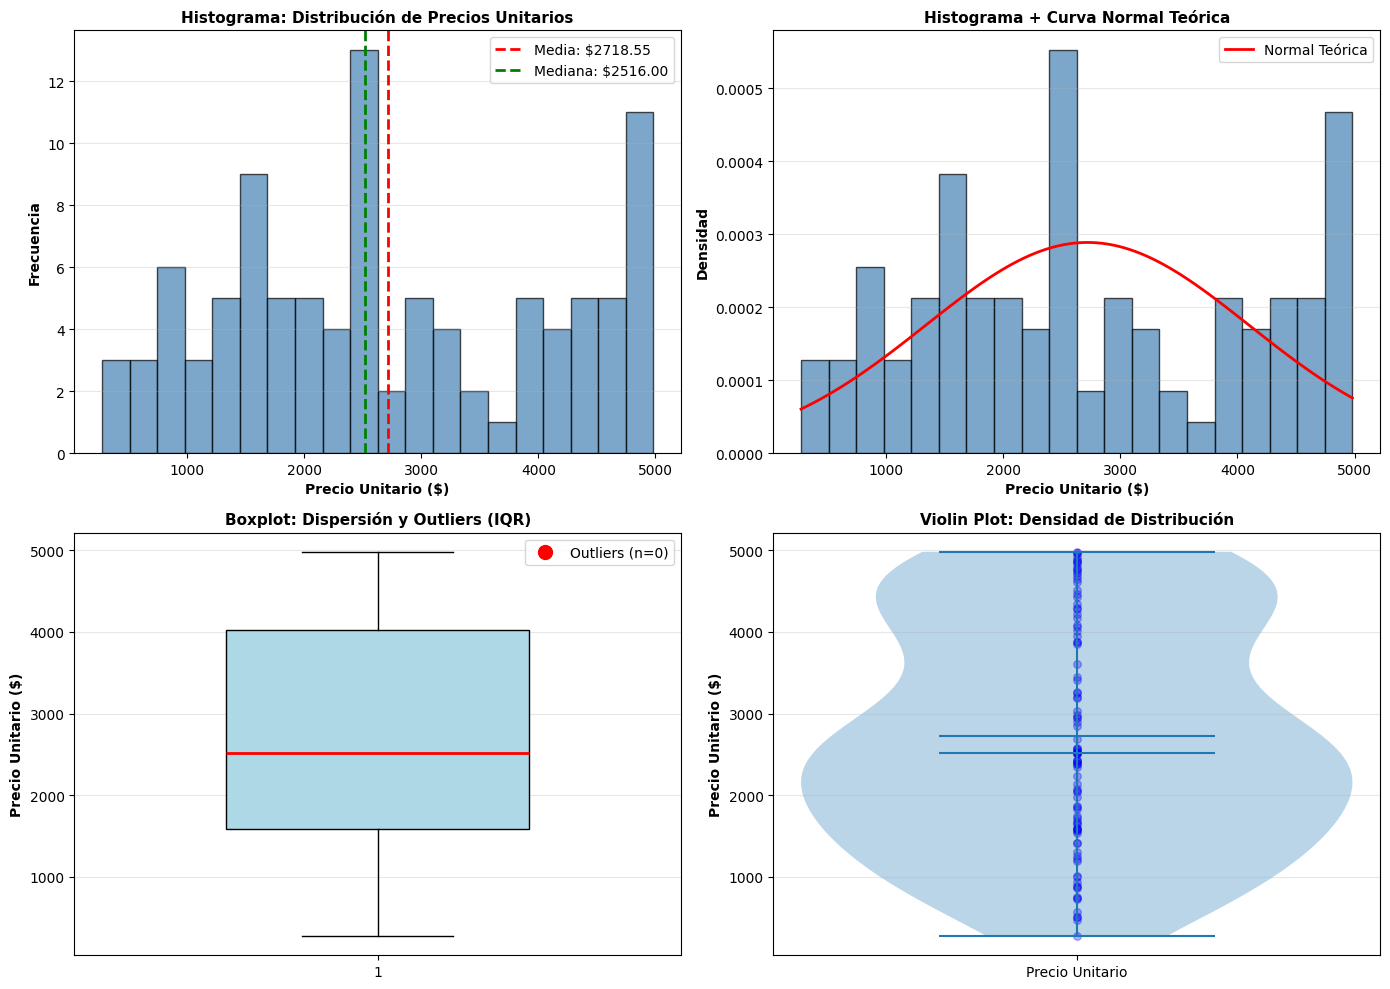


✅ Gráficos univariados completados.


In [37]:
# Visualización 1: Histograma con distribución normal superpuesta
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 1.1: Histograma simple
ax1 = axes[0, 0]
ax1.hist(datos, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: ${media:.2f}')
ax1.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: ${mediana:.2f}')
ax1.set_xlabel('Precio Unitario ($)', fontsize=10, fontweight='bold')
ax1.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax1.set_title('Histograma: Distribución de Precios Unitarios', fontsize=11, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# Subplot 1.2: Histograma con curva de distribución normal
ax2 = axes[0, 1]
n, bins, patches = ax2.hist(datos, bins=20, edgecolor='black', alpha=0.7, color='steelblue', density=True)
# Superponer distribución normal teórica
x_range = np.linspace(datos.min(), datos.max(), 100)
normal_dist = stats.norm.pdf(x_range, media, std)
ax2.plot(x_range, normal_dist, 'r-', linewidth=2, label='Normal Teórica')
ax2.set_xlabel('Precio Unitario ($)', fontsize=10, fontweight='bold')
ax2.set_ylabel('Densidad', fontsize=10, fontweight='bold')
ax2.set_title('Histograma + Curva Normal Teórica', fontsize=11, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3)

# Subplot 1.3: Boxplot
ax3 = axes[1, 0]
bp = ax3.boxplot(datos, vert=True, patch_artist=True, widths=0.5,
                  medianprops=dict(color='red', linewidth=2),
                  boxprops=dict(facecolor='lightblue', color='black'),
                  whiskerprops=dict(color='black'),
                  capprops=dict(color='black'))
ax3.scatter([1]*len(outliers_iqr), outliers_iqr, color='red', s=100, marker='o', 
           label=f'Outliers (n={len(outliers_iqr)})', zorder=5)
ax3.set_ylabel('Precio Unitario ($)', fontsize=10, fontweight='bold')
ax3.set_title('Boxplot: Dispersión y Outliers (IQR)', fontsize=11, fontweight='bold')
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# Subplot 1.4: Violin plot (densidad)
ax4 = axes[1, 1]
parts = ax4.violinplot([datos], positions=[1], widths=0.7, showmeans=True, showmedians=True)
ax4.scatter([1]*len(datos), datos, alpha=0.3, s=30, color='blue', label='Observaciones')
ax4.set_ylabel('Precio Unitario ($)', fontsize=10, fontweight='bold')
ax4.set_title('Violin Plot: Densidad de Distribución', fontsize=11, fontweight='bold')
ax4.set_xticks([1])
ax4.set_xticklabels(['Precio Unitario'])
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('\n✅ Gráficos univariados completados.')

### 📈 Visualización Bivariada - Precio Unitario por Categoría

**Tipo de gráfico:** Boxplot por grupo, Violin Plot por grupo, Estadísticas de resumen  
**Cómo:** Segmentamos la variable precio_unitario según categoría de producto y comparamos distribuciones lado a lado  
**Por qué:** Permite identificar diferencias de precios entre categorías, variabilidad intra-grupo y si existe confundimiento de precio por categoría


ESTADÍSTICAS POR CATEGORÍA: PRECIO_UNITARIO

📂 Categoría: ALIMENTOS
   Número de productos: 95
   Media:               $  2,718.47
   Mediana:             $  2,520.00
   Desv. Estándar:      $  1,394.21
   Rango:               [$   272.00 - $ 4,982.00]
   IQR:                 [$ 1,582.50 - $ 4,038.00]

📂 Categoría: LIMPIEZA
   Número de productos: 5
   Media:               $  2,720.00
   Mediana:             $  2,430.00
   Desv. Estándar:      $  1,251.36
   Rango:               [$ 1,592.00 - $ 4,854.00]
   IQR:                 [$ 2,142.00 - $ 2,582.00]
   Outliers (IQR):      1 producto(s)


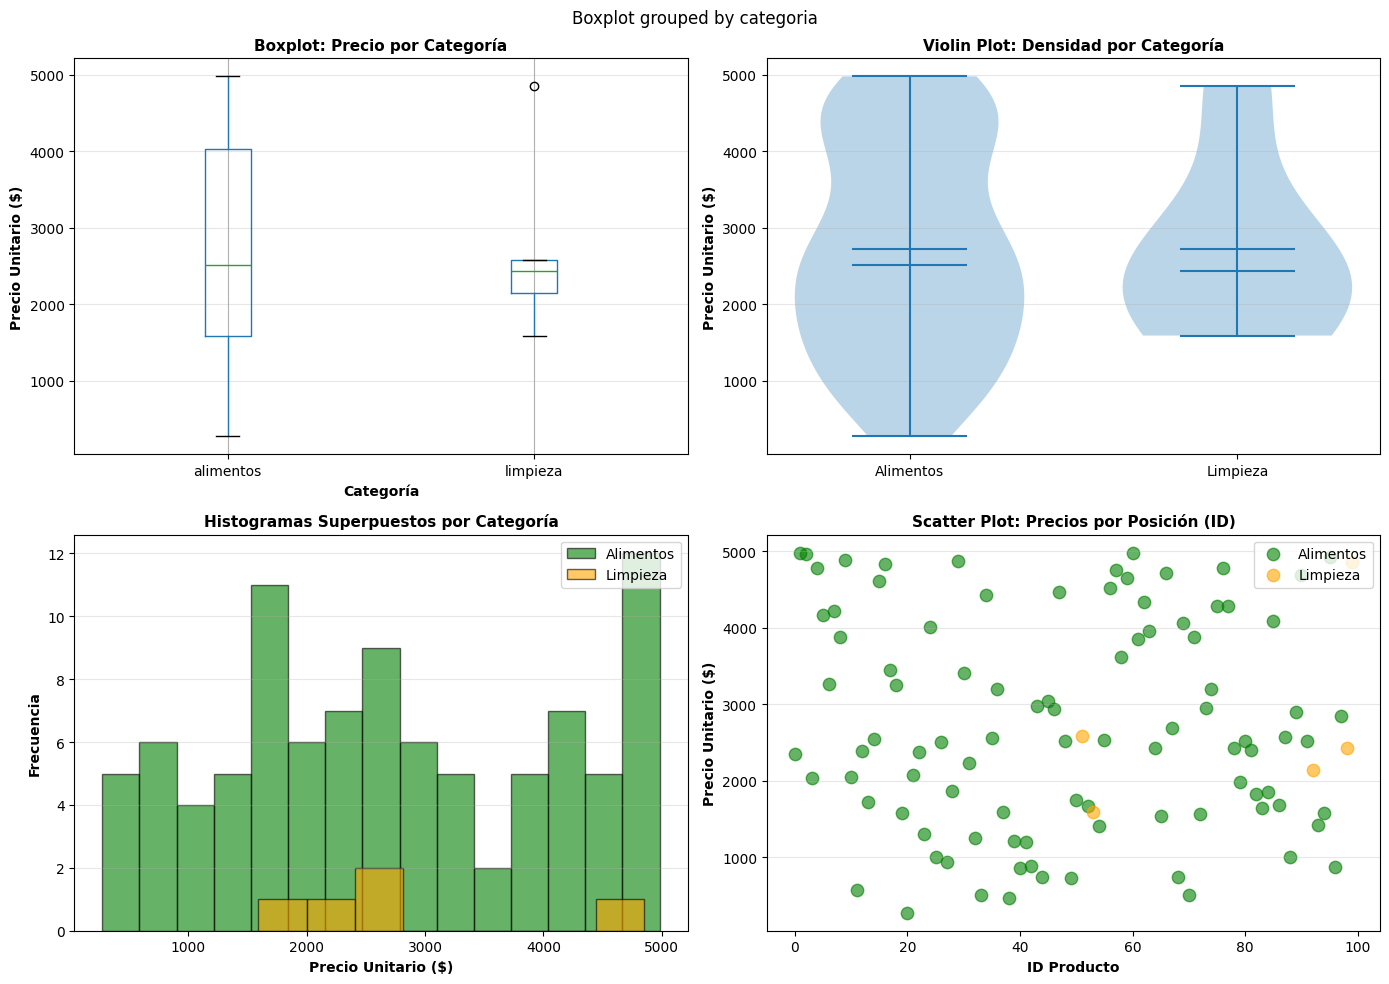


✅ Gráficos bivariados completados.


In [38]:
# Estadísticas por categoría
print('\n' + '='*100)
print('ESTADÍSTICAS POR CATEGORÍA: PRECIO_UNITARIO')
print('='*100)

categorias = df_productos_c['categoria'].unique()
stats_by_cat = []

for cat in sorted(categorias):
    datos_cat = df_productos_c[df_productos_c['categoria'] == cat]['precio_unitario']
    
    stats_dict = {
        'Categoría': cat,
        'N': len(datos_cat),
        'Media': datos_cat.mean(),
        'Mediana': datos_cat.median(),
        'Std': datos_cat.std(),
        'Min': datos_cat.min(),
        'P25': datos_cat.quantile(0.25),
        'P75': datos_cat.quantile(0.75),
        'Max': datos_cat.max()
    }
    stats_by_cat.append(stats_dict)
    
    print(f'\n📂 Categoría: {cat.upper()}')
    print(f'   Número de productos: {len(datos_cat)}')
    print(f'   Media:               ${datos_cat.mean():>10,.2f}')
    print(f'   Mediana:             ${datos_cat.median():>10,.2f}')
    print(f'   Desv. Estándar:      ${datos_cat.std():>10,.2f}')
    print(f'   Rango:               [${datos_cat.min():>9,.2f} - ${datos_cat.max():>9,.2f}]')
    print(f'   IQR:                 [${datos_cat.quantile(0.25):>9,.2f} - ${datos_cat.quantile(0.75):>9,.2f}]')
    
    # Outliers por categoría
    q1_cat = datos_cat.quantile(0.25)
    q3_cat = datos_cat.quantile(0.75)
    iqr_cat = q3_cat - q1_cat
    outliers_cat = datos_cat[(datos_cat < q1_cat - 1.5*iqr_cat) | (datos_cat > q3_cat + 1.5*iqr_cat)]
    if len(outliers_cat) > 0:
        print(f'   Outliers (IQR):      {len(outliers_cat)} producto(s)')

# Visualización 2: Comparación por categoría
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 2.1: Boxplot por categoría
ax1 = axes[0, 0]
df_productos_c.boxplot(column='precio_unitario', by='categoria', ax=ax1)
ax1.set_xlabel('Categoría', fontsize=10, fontweight='bold')
ax1.set_ylabel('Precio Unitario ($)', fontsize=10, fontweight='bold')
ax1.set_title('Boxplot: Precio por Categoría', fontsize=11, fontweight='bold')
plt.sca(ax1)
plt.xticks(rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Subplot 2.2: Violin plot por categoría
ax2 = axes[0, 1]
data_alimentos = df_productos_c[df_productos_c['categoria'] == 'alimentos']['precio_unitario']
data_limpieza = df_productos_c[df_productos_c['categoria'] == 'limpieza']['precio_unitario']
parts = ax2.violinplot([data_alimentos, data_limpieza], positions=[1, 2], widths=0.7, 
                        showmeans=True, showmedians=True)
ax2.set_ylabel('Precio Unitario ($)', fontsize=10, fontweight='bold')
ax2.set_title('Violin Plot: Densidad por Categoría', fontsize=11, fontweight='bold')
ax2.set_xticks([1, 2])
ax2.set_xticklabels(['Alimentos', 'Limpieza'])
ax2.grid(axis='y', alpha=0.3)

# Subplot 2.3: Histogramas superpuestos
ax3 = axes[1, 0]
ax3.hist(data_alimentos, bins=15, alpha=0.6, label='Alimentos', edgecolor='black', color='green')
ax3.hist(data_limpieza, bins=8, alpha=0.6, label='Limpieza', edgecolor='black', color='orange')
ax3.set_xlabel('Precio Unitario ($)', fontsize=10, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=10, fontweight='bold')
ax3.set_title('Histogramas Superpuestos por Categoría', fontsize=11, fontweight='bold')
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# Subplot 2.4: Scatter plot con color por categoría
ax4 = axes[1, 1]
for cat in ['alimentos', 'limpieza']:
    mask = df_productos_c['categoria'] == cat
    color = 'green' if cat == 'alimentos' else 'orange'
    ax4.scatter(df_productos_c[mask].index, df_productos_c[mask]['precio_unitario'], 
               label=cat.capitalize(), alpha=0.6, s=80, color=color)
ax4.set_xlabel('ID Producto', fontsize=10, fontweight='bold')
ax4.set_ylabel('Precio Unitario ($)', fontsize=10, fontweight='bold')
ax4.set_title('Scatter Plot: Precios por Posición (ID)', fontsize=11, fontweight='bold')
ax4.legend(loc='upper right')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('\n✅ Gráficos bivariados completados.')

### 📈 Análisis Composicional - Distribución de Productos por Categoría

**Tipo de gráfico:** Pie Chart, Bar Chart, Heatmap  
**Cómo:** Representan las proporciones y conteos de productos por cada categoría mediante gráficos de sectores, barras y matrices  
**Por qué:** Permiten visualizar rápidamente el balance/desbalance del catálogo y la contribución de cada categoría al total


ANÁLISIS COMPOSICIONAL: DISTRIBUCIÓN POR CATEGORÍA

📊 DISTRIBUCIÓN DE PRODUCTOS:
   Alimentos   :  95 productos ( 95.0%)
   Limpieza    :   5 productos (  5.0%)

   Total:           100 productos (100.0%)


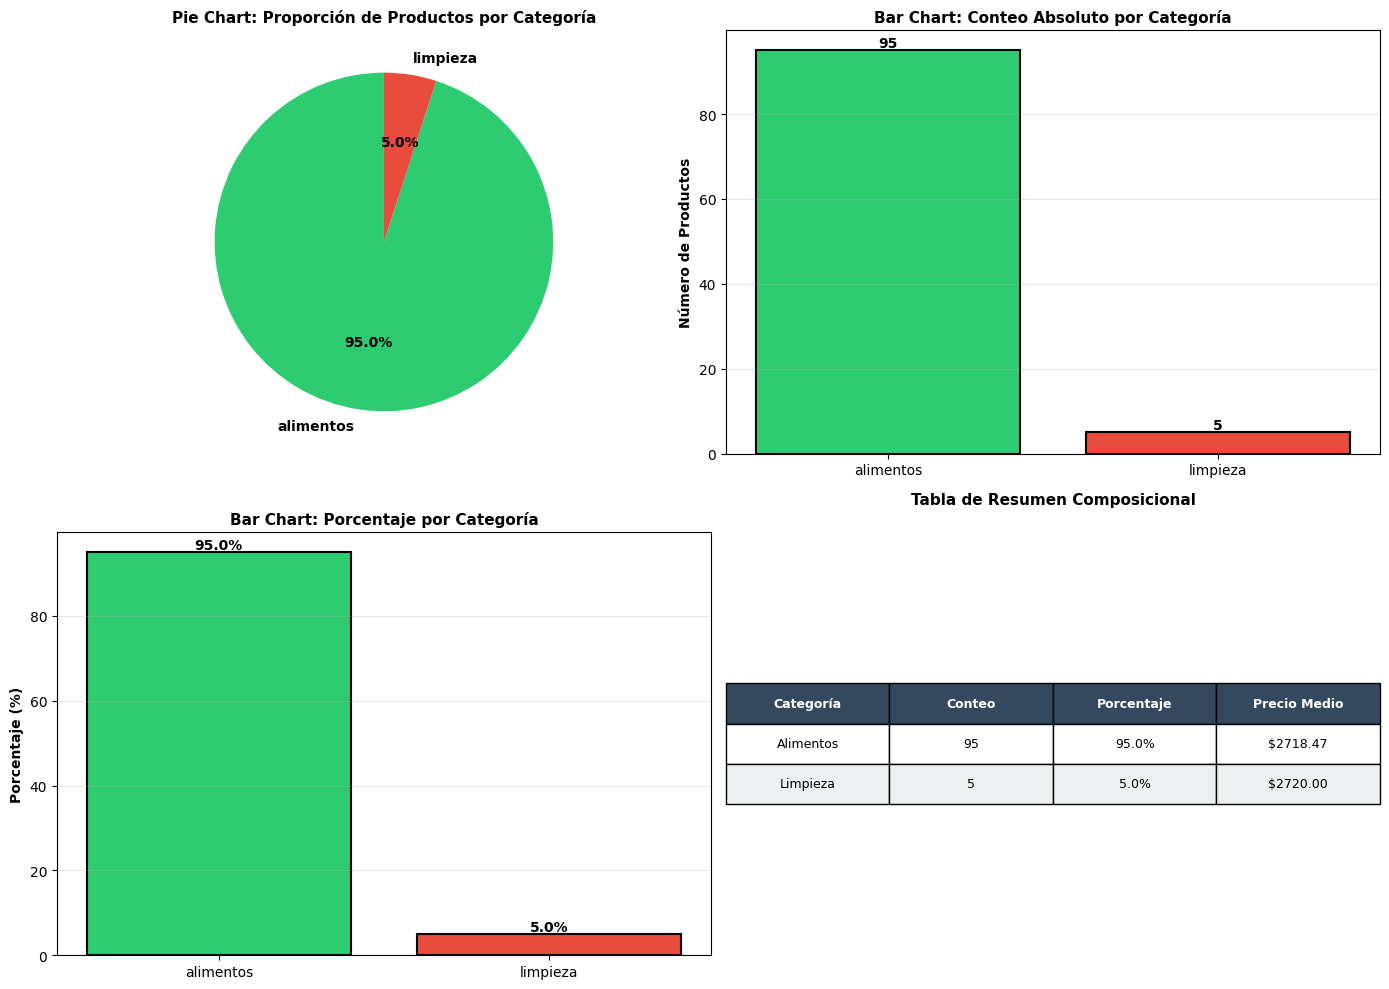


✅ Gráficos composicionales completados.


In [39]:
# Conteo y proporciones por categoría
print('\n' + '='*100)
print('ANÁLISIS COMPOSICIONAL: DISTRIBUCIÓN POR CATEGORÍA')
print('='*100)

conteo_cat = df_productos_c['categoria'].value_counts()
proporcion_cat = df_productos_c['categoria'].value_counts(normalize=True) * 100

print(f'\n📊 DISTRIBUCIÓN DE PRODUCTOS:')
for cat in sorted(df_productos_c['categoria'].unique()):
    count = conteo_cat[cat]
    pct = proporcion_cat[cat]
    print(f'   {cat.capitalize():12s}: {count:>3d} productos ({pct:>5.1f}%)')

print(f'\n   Total:           {len(df_productos_c):>3d} productos (100.0%)')

# Visualización 3: Composición
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 3.1: Pie chart
ax1 = axes[0, 0]
colors = ['#2ecc71', '#e74c3c']
wedges, texts, autotexts = ax1.pie(conteo_cat, labels=conteo_cat.index, autopct='%1.1f%%',
                                     colors=colors, startangle=90, textprops={'fontsize': 10, 'weight': 'bold'})
ax1.set_title('Pie Chart: Proporción de Productos por Categoría', fontsize=11, fontweight='bold')

# Subplot 3.2: Bar chart de conteos
ax2 = axes[0, 1]
bars = ax2.bar(conteo_cat.index, conteo_cat.values, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Número de Productos', fontsize=10, fontweight='bold')
ax2.set_title('Bar Chart: Conteo Absoluto por Categoría', fontsize=11, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Subplot 3.3: Bar chart de porcentajes
ax3 = axes[1, 0]
bars = ax3.bar(proporcion_cat.index, proporcion_cat.values, color=colors, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Porcentaje (%)', fontsize=10, fontweight='bold')
ax3.set_title('Bar Chart: Porcentaje por Categoría', fontsize=11, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Subplot 3.4: Tabla de resumen
ax4 = axes[1, 1]
ax4.axis('off')
tabla_data = []
tabla_data.append(['Categoría', 'Conteo', 'Porcentaje', 'Precio Medio'])
for cat in sorted(df_productos_c['categoria'].unique()):
    count = conteo_cat[cat]
    pct = proporcion_cat[cat]
    mean_price = df_productos_c[df_productos_c['categoria'] == cat]['precio_unitario'].mean()
    tabla_data.append([cat.capitalize(), f'{count}', f'{pct:.1f}%', f'${mean_price:.2f}'])

tabla = ax4.table(cellText=tabla_data, cellLoc='center', loc='center',
                 colWidths=[0.25, 0.25, 0.25, 0.25])
tabla.auto_set_font_size(False)
tabla.set_fontsize(9)
tabla.scale(1, 2)

# Formatear header
for i in range(4):
    tabla[(0, i)].set_facecolor('#34495e')
    tabla[(0, i)].set_text_props(weight='bold', color='white')

# Formatear filas de datos
for i in range(1, len(tabla_data)):
    for j in range(4):
        if i % 2 == 0:
            tabla[(i, j)].set_facecolor('#ecf0f1')
        else:
            tabla[(i, j)].set_facecolor('#ffffff')

ax4.set_title('Tabla de Resumen Composicional', fontsize=11, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print('\n✅ Gráficos composicionales completados.')

### 📈 Interpretaciones y Hallazgos Clave del EDA

In [40]:
print('\n' + '='*100)
print('RESUMEN E INTERPRETACIONES: ANÁLISIS EXPLORATORIO COMPLETO')
print('='*100)

print('\n📌 HALLAZGO 1: DISTRIBUCIÓN DE PRECIOS')
if abs(skewness) < 0.5:
    asimetria_txt = "SIMÉTRICA (distribución equilibrada, sin sesgo pronunciado)"
elif skewness > 0:
    asimetria_txt = "ASIMÉTRICA POSITIVA (cola hacia la derecha, más productos económicos)"
else:
    asimetria_txt = "ASIMÉTRICA NEGATIVA (cola hacia la izquierda, más productos caros)"

print(f"   • La distribución de precios es: {asimetria_txt}")
print(f"   • Skewness={skewness:.4f} | Kurtosis={kurtosis_val:.4f}")
print(f"   • Interpretación: Los precios tienden a concentrarse alrededor de la mediana (${mediana:,.2f})")

print('\n📌 HALLAZGO 2: VARIABILIDAD DE PRECIOS')
if cv < 15:
    variabilidad = "BAJA (productos con precios muy similares)"
elif cv < 30:
    variabilidad = "MODERADA (cierta dispersión pero controlada)"
else:
    variabilidad = "ALTA (gran rango de precios, portfolio diverso)"

print(f"   • Coeficiente de Variación: {cv:.2f}% → {variabilidad}")
print(f"   • Desv. Estándar: ${std:,.2f} | Media: ${media:,.2f}")
print(f"   • Rango: ${rango:,.2f} (Min=${datos.min():,.2f}, Max=${datos.max():,.2f})")

print('\n📌 HALLAZGO 3: VALORES ATÍPICOS (OUTLIERS)')
outliers_total = len(set(outliers_iqr).union(set(outliers_zscore)))
print(f"   • Outliers detectados: {outliers_total} productos ({outliers_total/len(df_productos_c)*100:.1f}%)")
print(f"   • Por método IQR: {len(outliers_iqr)} productos")
print(f"   • Por Z-score modificado: {len(outliers_zscore)} productos")
if outliers_total > 0:
    print(f"   • Acción recomendada: Revisar estos productos para análisis de precios especiales")

print('\n📌 HALLAZGO 4: DIFERENCIAS POR CATEGORÍA')
cat_stats = df_productos_c.groupby('categoria')['precio_unitario'].agg(['count', 'mean', 'std', 'min', 'max'])
for cat in sorted(df_productos_c['categoria'].unique()):
    n = len(df_productos_c[df_productos_c['categoria'] == cat])
    mean_cat = df_productos_c[df_productos_c['categoria'] == cat]['precio_unitario'].mean()
    std_cat = df_productos_c[df_productos_c['categoria'] == cat]['precio_unitario'].std()
    print(f"   • {cat.capitalize():12s}: μ=${mean_cat:>9,.2f}, σ=${std_cat:>9,.2f}, n={n:>3d}")

precio_alimentos = df_productos_c[df_productos_c['categoria'] == 'alimentos']['precio_unitario'].mean()
precio_limpieza = df_productos_c[df_productos_c['categoria'] == 'limpieza']['precio_unitario'].mean()
ratio = precio_alimentos / precio_limpieza if precio_limpieza > 0 else 0
print(f"   • Ratio (Alimentos/Limpieza): {ratio:.2f}x")

print('\n📌 HALLAZGO 5: CONCENTRACIÓN DE PRECIOS')
p10_val = datos.quantile(0.10)
p90_val = datos.quantile(0.90)
percent_80_central = ((datos >= p10_val) & (datos <= p90_val)).sum() / len(datos) * 100
print(f"   • 80% de productos se concentran entre: ${p10_val:,.2f} y ${p90_val:,.2f}")
print(f"   • Observaciones en rango central [P10-P90]: {percent_80_central:.1f}%")

print('\n' + '='*100)
print('✅ ANÁLISIS EXPLORATORIO COMPLETADO')
print('='*100)
print('\n📋 RECOMENDACIONES PARA SIGUIENTE FASE:')
print('   1. Validar outliers identificados (probablemente productos premium)')
print('   2. Considerar análisis de ventas por categoría (si datos están disponibles)')
print('   3. Evaluar elasticidad precio-demanda por categoría')
print('   4. Revisar estrategia de pricing para categoría de Limpieza (menor número de SKUs)')
print('\n')


RESUMEN E INTERPRETACIONES: ANÁLISIS EXPLORATORIO COMPLETO

📌 HALLAZGO 1: DISTRIBUCIÓN DE PRECIOS
   • La distribución de precios es: SIMÉTRICA (distribución equilibrada, sin sesgo pronunciado)
   • Skewness=0.1495 | Kurtosis=-1.1672
   • Interpretación: Los precios tienden a concentrarse alrededor de la mediana ($2,516.00)

📌 HALLAZGO 2: VARIABILIDAD DE PRECIOS
   • Coeficiente de Variación: 50.82% → ALTA (gran rango de precios, portfolio diverso)
   • Desv. Estándar: $1,381.64 | Media: $2,718.55
   • Rango: $4,710.00 (Min=$272.00, Max=$4,982.00)

📌 HALLAZGO 3: VALORES ATÍPICOS (OUTLIERS)
   • Outliers detectados: 0 productos (0.0%)
   • Por método IQR: 0 productos
   • Por Z-score modificado: 0 productos

📌 HALLAZGO 4: DIFERENCIAS POR CATEGORÍA
   • Alimentos   : μ=$ 2,718.47, σ=$ 1,394.21, n= 95
   • Limpieza    : μ=$ 2,720.00, σ=$ 1,251.36, n=  5
   • Ratio (Alimentos/Limpieza): 1.00x

📌 HALLAZGO 5: CONCENTRACIÓN DE PRECIOS
   • 80% de productos se concentran entre: $885.50 y $4,7

C:\Users\Asus\AppData\Local\Temp\ipykernel_6912\2734838844.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_stats = df_productos_c.groupby('categoria')['precio_unitario'].agg(['count', 'mean', 'std', 'min', 'max'])
